<a href="https://colab.research.google.com/github/Taeho-Kim-0322/Machine-learning/blob/master/svm_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- SVM : 선형 or 비선형으로 데이터를 분류하는 규칙을 학습하는 모델
- 범주형 변수 : SVC, 연속형 변수 : SVR로 SVM의 사용법이 달라짐
- 커널 SVM은 스케일에 민감하므로, 반드시 정규화를 해주어야 함

In [2]:
import sklearn.datasets as d
import pandas as pd

# breast_cancer 데이터 셋 로드
x = d.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

cancer.info()
cancer.describe()
cancer.target.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

1    357
0    212
Name: target, dtype: int64

In [3]:
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [12]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
 
svm_clf =svm.SVC(kernel = 'linear')

# 교차검증
X = cancer[cancer.columns[:-1]]
y = cancer['target']

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9455364073901569


In [13]:
pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

,fit_time,score_time,test_score
0,1.061634,0.001507,0.947368
1,2.513241,0.001479,0.929825
2,1.560887,0.001506,0.973684
3,0.798446,0.001547,0.921053
4,1.402377,0.001501,0.955752


In [14]:
# SVM, kernel = 'rbf'로 비선형분리 진행
 
svm_clf =svm.SVC(kernel = 'rbf')

# 교차검증

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))




,fit_time,score_time,test_score
0,0.006388,0.001983,0.850877
1,0.006352,0.002049,0.894737
2,0.006638,0.002089,0.929825
3,0.006630,0.002094,0.947368
4,0.006675,0.002064,0.938053


In [15]:

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9121720229777983


In [19]:
X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection as ms


# StandarScaler 적용

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, 
                                                      test_size = 0.3, random_state = 100)

import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
 
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 변환된 X로 교차검증

scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_scaled, y, cv =5))


,fit_time,score_time,test_score
0,0.004884,0.000751,0.956140
1,0.003894,0.000742,0.982456
2,0.004451,0.000707,0.964912
3,0.003614,0.000626,0.964912
4,0.003668,0.000624,0.982301


In [20]:
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9701443875174661


In [23]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
3,1.000,0.974873
1,0.010,0.969778
2,0.100,0.969778
4,10.000,0.957310
5,25.000,0.957278
6,50.000,0.957278
7,100.000,0.957278
0,0.001,0.947120


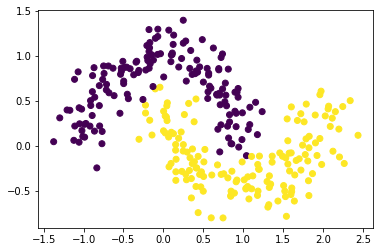

In [25]:
# 비선형분리
import sklearn.datasets as d
import matplotlib.pyplot as plt


X, y = d.make_moons(n_samples = 300, noise = 0.16, random_state = 42)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [27]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, 
                                                      test_size = 0.3, random_state = 100)
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
 
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 교차검증

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))


,fit_time,score_time,test_score
0,0.001170,0.000400,0.866667
1,0.001119,0.000354,0.883333
2,0.001256,0.000355,0.883333
3,0.001159,0.000339,0.833333
4,0.001174,0.000340,0.833333


In [28]:
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.86


In [29]:
# SVM, kernel = 'rbf'로 비선형분리 진행
 
svm_clf =svm.SVC(kernel = 'rbf')

# 교차검증

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

,fit_time,score_time,test_score
0,0.001011,0.000417,0.983333
1,0.001074,0.000453,0.966667
2,0.000973,0.000383,0.983333
3,0.000951,0.000384,0.950000
4,0.000969,0.000403,0.966667


In [30]:
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.97
